# Google PlayStore Data 
### Complete EDA analysis for Biginners to Advance EDA

**Author Name:** Talha Aslam

**Email:** ranatalha30055@gmail.com

**Github:** [Github](https://github.com/TalhaAslam44)

**LinkedIn:** [LinkedIn](https://www.linkedin.com/in/talha-aslam-2693661b7/)

1. [About the Dataset](#about-the-dataset)

2. [Importing Libraries](#1-importing-libraries)

3. [data loading](#2-data-loading)

4. [Duplicates](#3-duplicates)

5. [How to make size a numeric column](#4-how-to-make-size-a-numeric-column)

6. [Making Install a numeric column](#5-making-install-numeric-column)

7. [Making Price a numeric column](#6-making-price-a-numeric-column)

8. [Descriptive Statistics](#7-descriptive-statistics)

9. [Dealing with Missing Values](#8-dealing-with-missing-values)

10. [Insights from Data](#9-insights-from-data)

11. [Conclusion](#conclusion)


# About the Dataset

## Description

The Data is set is Downloaded from Kaggle and from following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/) 

### Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.


### Content

Each app (row) has values for catergory, rating, size, and more.


### Acknowledgements

This information is scraped from the Google Play Store. This app information would not be available without it.


### Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#this is for jupyter notebook to show the plot in the notebook itself instead of opening
%matplotlib inline  


# 2. Data Loading 

- Let's load the csv file

In [2]:
df = pd.read_csv('./data/googleplaystore.csv')   

- Let's have a look on top 5 rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [4]:
# For our convenience, we will set options to maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hide All warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Hide All warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [7]:
df.shape

(10841, 13)

---
### Observations:

- Now we know that our Data set has 10841 rows and 13 columns

But thats not enough, Let's have a look on the columns and their data types using detailed info function

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


---
### Obersvations

- There are 10841 rows and 13 columns.
- The columns are of different types.
- There is 1 float64, 1 int64 and 11 object datatype columns.
- The columns in the datasets are:
  - 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',   'Android Ver'
- There are some missing values in the dataset which we will read in details and deal later on in the notebook.
- There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
  - 'Size', 'Installs', 'Price'

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

# 3. Duplicates

- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [9]:
# Checking For Duplicates values
df.duplicated().sum()

483

---
### Observations

- There are 483 Duplicated rows in the Dataset.

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [10]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?



let's check for number of duplicates in each column using a for loop and printing the output

In [11]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10807
Number of duplicates in Rating column are: 10801
Number of duplicates in Reviews column are: 4840
Number of duplicates in Size column are: 10380
Number of duplicates in Installs column are: 10820
Number of duplicates in Type column are: 10838
Number of duplicates in Price column are: 10749
Number of duplicates in Content Rating column are: 10835
Number of duplicates in Genres column are: 10721
Number of duplicates in Last Updated column are: 9464
Number of duplicates in Current Ver column are: 8009
Number of duplicates in Android Ver column are: 10807


This means that the only better way to find duplicates is to check for whole data

In [12]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [13]:
# find exact duplicates and print them
#df[df['App'].duplicated(keep=False)].sort_values(by='App')

- Now we remove the duplicates

In [14]:
# Now we remove the duplicated rows
df.drop_duplicates(inplace=True)

In [15]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10358


In [16]:
df.shape

(10358, 13)

---
### Observations

- After eliminating the duplicates rows we are left with 10358 rows



In [17]:
# Lets Check for missing values
df.isnull().sum()   

App                  0
Category             1
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

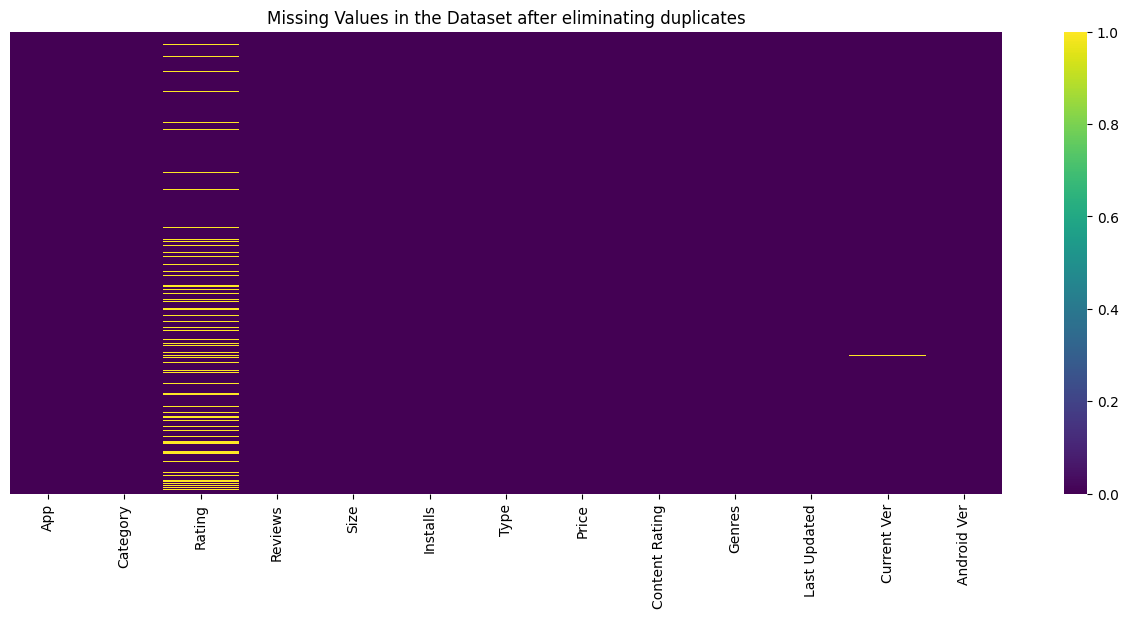

In [18]:
# To visualize it in detail we use heatmap from seaborn
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values in the Dataset after eliminating duplicates')
plt.show()

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.describe()

,Rating,Reviews
count,8893.000000,1.035800e+04
mean,4.187619,4.058654e+05
std,0.522910,2.696651e+06
min,1.000000,0.000000e+00
25%,4.000000,3.200000e+01
50%,4.300000,1.678500e+03
75%,4.500000,4.640425e+04
max,5.000000,7.815831e+07


---
### Observations
 - we should have 5 columns to be numeric let's do this

# 4. How to make size a numeric column?
 

In [21]:
df['Size'].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
15M                    174
17M                    155
26M                    145
16M                    143
19M                    135
10M                    133
20M                    131
25M                    131
21M                    130
24M                    129
18M                    124
23M                    109
22M                    108
29M                     95
27M                     94
28M                     92
30M                     84
33M                     78
3.3M                    76
37M                     72
31M                     69
2.3M                    68
2.5M                    68
35M                     68
2.9M                    67
2.8M                    65
3.4M                    64
3.7M                    63
32M                     62
3.0M                    62
3.9M                    61
3.8M                   

In [22]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
### Observations:

1. "Varies with Device"
2. Anything With "M"
3. Anythin with "K"

- There are several uniques values in the Size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type

In [23]:
df['Size'].isnull().sum()

0

- No missing values we are good to go

Verufy the numbers of values and 3 different kinds of values

In [24]:
# Find the values in size column which has  'M' in them

df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8517

In [25]:
# Find the values in size column which has 'k' in them  
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

315

In [26]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1526

In [27]:
len(df)

10358

In [28]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8517+315+1526

10358

---
### Observations

- We have `8517` values in `M` units
- We have `315` values in `k` units
- We have `1526` value in `Varies with device`

Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [29]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric


def convert_size(size):
     # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''



    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size  

In [30]:
#  Let's apply the function we created
df['Size'] = df['Size'].apply(convert_size)

In [31]:
# Rename the columns
df.rename(columns={'Size': "Size_in_Bytes"}, inplace=True)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
# As we use Mb as the standard unit for size, we will convert the size in bytes to Mb
df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x: x/(1024*1024) if x > 0 else x)

In [34]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [35]:
df['Size_in_Mb'].dtype

dtype('float64')

---
### Observations

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

Hence, We Successfully converted size column from object dtype to numeric dtype.

---
- Now, Let's have a look on install column

# 5. Making Install Numeric column

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size_in_Bytes   8832 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Size_in_Mb      8832 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


In [37]:
df['Installs'].isnull().sum()

0

In [38]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [39]:
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [40]:
# Let's find how many values are there in the Installs column which has '+' in them
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10357

In [41]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10358

---
### Observations

- The only problem i see in the install column is the `+` sign in the values, let's remove them and convert the column into the numeric data type.
- The tottal values in the `install` column are `10358` and there are no no null values in the column.
- However , one value 0 has no `+` sign.
- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type.

In [42]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changed and the `+` and `,` sign has been removed

In [43]:
df.head() 

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [44]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Size_in_Mb
count,8893.000000,1.035800e+04,8.832000e+03,1.035800e+04,8832.000000
mean,4.187619,4.058654e+05,2.231930e+07,1.415639e+07,21.285343
std,0.522910,2.696651e+06,2.363507e+07,8.023580e+07,22.540155
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.200000e+01,4.928307e+06,1.000000e+03,4.700000
50%,4.300000,1.678500e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,4.640425e+04,3.040870e+07,1.000000e+06,29.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [45]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [46]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [47]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [48]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2133
High                  2005
Very High             1815
More than moderate    1603
Moderate              1502
Top Notch              751
Very low               534
no                      15
Name: count, dtype: int64

---
- Let's have look on `Price` column

# 6. Making Price a numeric column

In [49]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [50]:
df['Price'].value_counts()

Price
0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
$3.99        60
$1.49        46
$5.99        27
$2.49        25
$9.99        19
$6.99        12
$399.99      12
$14.99        9
$4.49         9
$3.49         7
$7.99         7
$5.49         5
$8.99         5
$19.99        5
$29.99        5
$6.49         5
$12.99        4
$24.99        4
$1.00         3
$2.00         3
$11.99        3
$8.49         2
$3.95         2
$17.99        2
$13.99        2
$1.70         2
$39.99        2
$10.00        2
$7.49         2
$10.99        2
$16.99        2
$109.99       1
$3.08         1
$2.59         1
$4.80         1
$1.96         1
$19.40        1
$3.90         1
$4.59         1
$15.46        1
$1.20         1
$3.04         1
$4.29         1
$3.28         1
$2.60         1
$2.56         1
$1.26         1
$4.60         1
$28.99        1
$2.95         1
$2.90         1
$1.97         1
$200.00       1
$89.99        1
$394.99       1
$3.61         1
$30.99        1
$1

In [51]:
df['Price'].isnull().sum()

0

- we have no Null values
- We need to confirm if the values in the Price column are only with $ sign or not

In [52]:
# count the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

765

In [53]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

9593

In [54]:
9593+765

10358

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `765+9593=10358` Total values.
- The only problem is $ sign let's remove it and convert the column into numeric data type.


In [55]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [56]:
df['Price'].value_counts()

Price
0.00      9593
0.99       146
2.99       125
1.99        73
4.99        70
3.99        60
1.49        46
5.99        27
2.49        25
9.99        19
6.99        12
399.99      12
14.99        9
4.49         9
3.49         7
7.99         7
5.49         5
8.99         5
19.99        5
29.99        5
6.49         5
12.99        4
24.99        4
1.00         3
2.00         3
11.99        3
8.49         2
3.95         2
17.99        2
13.99        2
1.70         2
39.99        2
10.00        2
7.49         2
10.99        2
16.99        2
109.99       1
3.08         1
2.59         1
4.80         1
1.96         1
19.40        1
3.90         1
4.59         1
15.46        1
1.20         1
3.04         1
4.29         1
3.28         1
2.60         1
2.56         1
1.26         1
4.60         1
28.99        1
2.95         1
2.90         1
1.97         1
200.00       1
89.99        1
394.99       1
3.61         1
30.99        1
154.99       1
1.61         1
46.99        1
4.85         1
9.00

In [57]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10358 non-null  object  
 1   Category           10357 non-null  object  
 2   Rating             8893 non-null   float64 
 3   Reviews            10358 non-null  int64   
 4   Size_in_Bytes      8832 non-null   float64 
 5   Installs           10358 non-null  int64   
 6   Type               10357 non-null  object  
 7   Price              10358 non-null  float64 
 8   Content Rating     10358 non-null  object  
 9   Genres             10357 non-null  object  
 10  Last Updated       10358 non-null  object  
 11  Current Ver        10350 non-null  object  
 12  Android Ver        10356 non-null  object  
 13  Size_in_Mb         8832 non-null   float64 
 14  Installs_category  10358 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memory usa

In [59]:
# Let's rename the Price Column into Price in Dollor 
df.rename(columns = {'Price in Dollar': 'Price'}, inplace = True)

In [60]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [61]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
count,8893.000000,1.035800e+04,8.832000e+03,1.035800e+04,10358.000000,8832.000000
mean,4.187619,4.058654e+05,2.231930e+07,1.415639e+07,1.030701,21.285343
std,0.522910,2.696651e+06,2.363507e+07,8.023580e+07,16.277843,22.540155
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.200000e+01,4.928307e+06,1.000000e+03,0.000000,4.700000
50%,4.300000,1.678500e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,4.640425e+04,3.040870e+07,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [62]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0307009075111024 $


In [63]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10358 non-null  object  
 1   Category           10357 non-null  object  
 2   Rating             8893 non-null   float64 
 3   Reviews            10358 non-null  int64   
 4   Size_in_Bytes      8832 non-null   float64 
 5   Installs           10358 non-null  int64   
 6   Type               10357 non-null  object  
 7   Price              10358 non-null  float64 
 8   Content Rating     10358 non-null  object  
 9   Genres             10357 non-null  object  
 10  Last Updated       10358 non-null  object  
 11  Current Ver        10350 non-null  object  
 12  Android Ver        10356 non-null  object  
 13  Size_in_Mb         8832 non-null   float64 
 14  Installs_category  10358 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memory usa

- So we have converted the columns into numeric type which were in object type columns.

# 7. Descriptive Statistics

In [65]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
count,8893.000000,1.035800e+04,8.832000e+03,1.035800e+04,10358.000000,8832.000000
mean,4.187619,4.058654e+05,2.231930e+07,1.415639e+07,1.030701,21.285343
std,0.522910,2.696651e+06,2.363507e+07,8.023580e+07,16.277843,22.540155
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.200000e+01,4.928307e+06,1.000000e+03,0.000000,4.700000
50%,4.300000,1.678500e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,4.640425e+04,3.040870e+07,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


---
### Observations
- Now, we have only 5 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of 0 and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

### But even before that we have to think about the missing values in the dataset.

# 8. Dealing With Missing Values

Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Let's have a look on missing values

In [66]:
 # this will show the number of null values in each column
df.isnull().sum()

App                     0
Category                1
Rating               1465
Reviews                 0
Size_in_Bytes        1526
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1526
Installs_category       0
dtype: int64

In [67]:
 # this will show the number of null values in each column in descending order
df.isnull().sum().sort_values(ascending = False)

Size_in_Bytes        1526
Size_in_Mb           1526
Rating               1465
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [68]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

4530

In [69]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_Bytes        14.732574
Size_in_Mb           14.732574
Rating               14.143657
Current Ver           0.077235
Android Ver           0.019309
Category              0.009654
Type                  0.009654
Genres                0.009654
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the missing values in the dataset

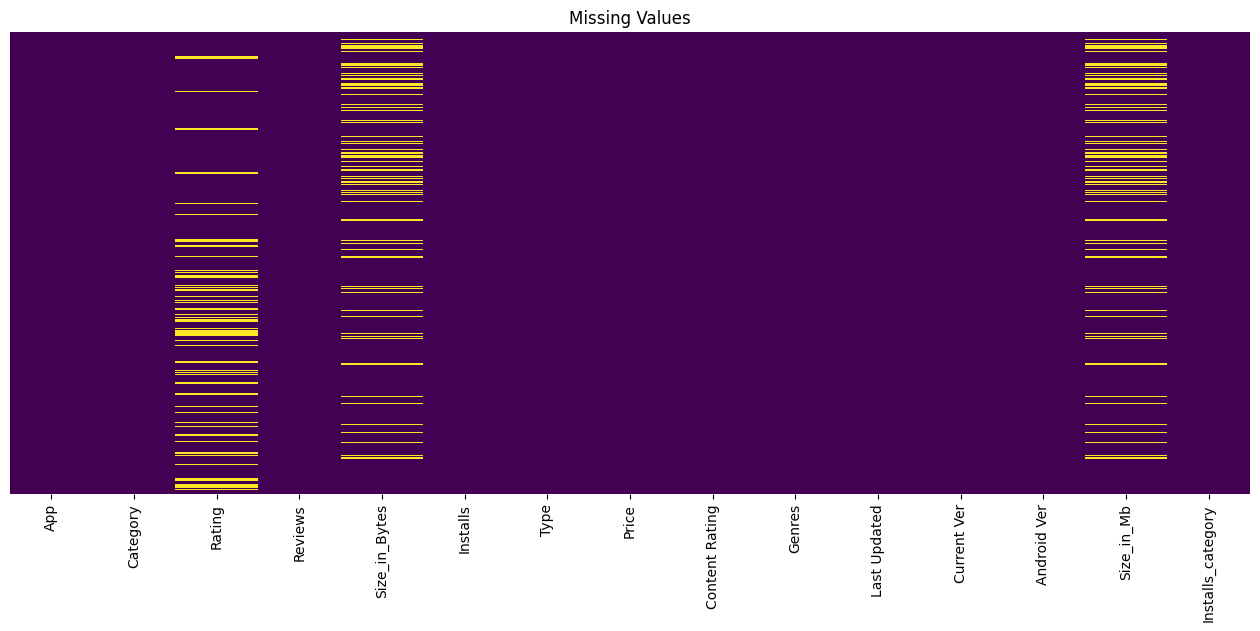

In [70]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe
plt.title('Missing Values')
plt.show()

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

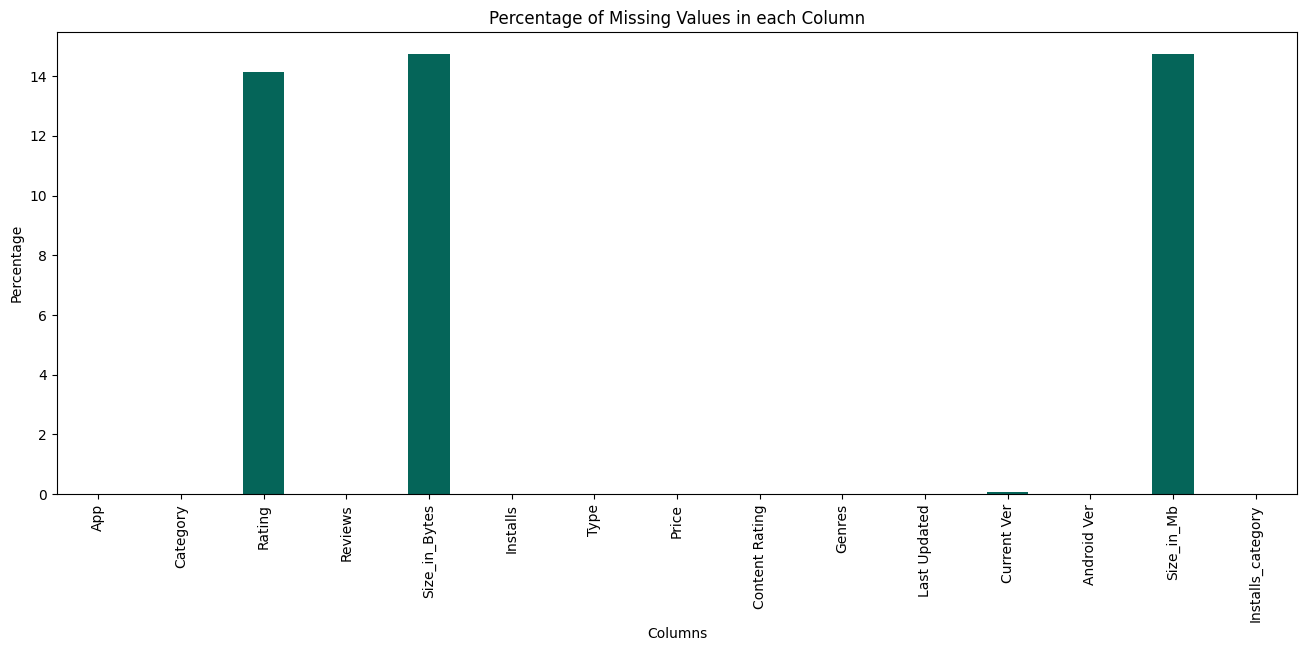

In [71]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar', color = '#056559')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column below 1%')

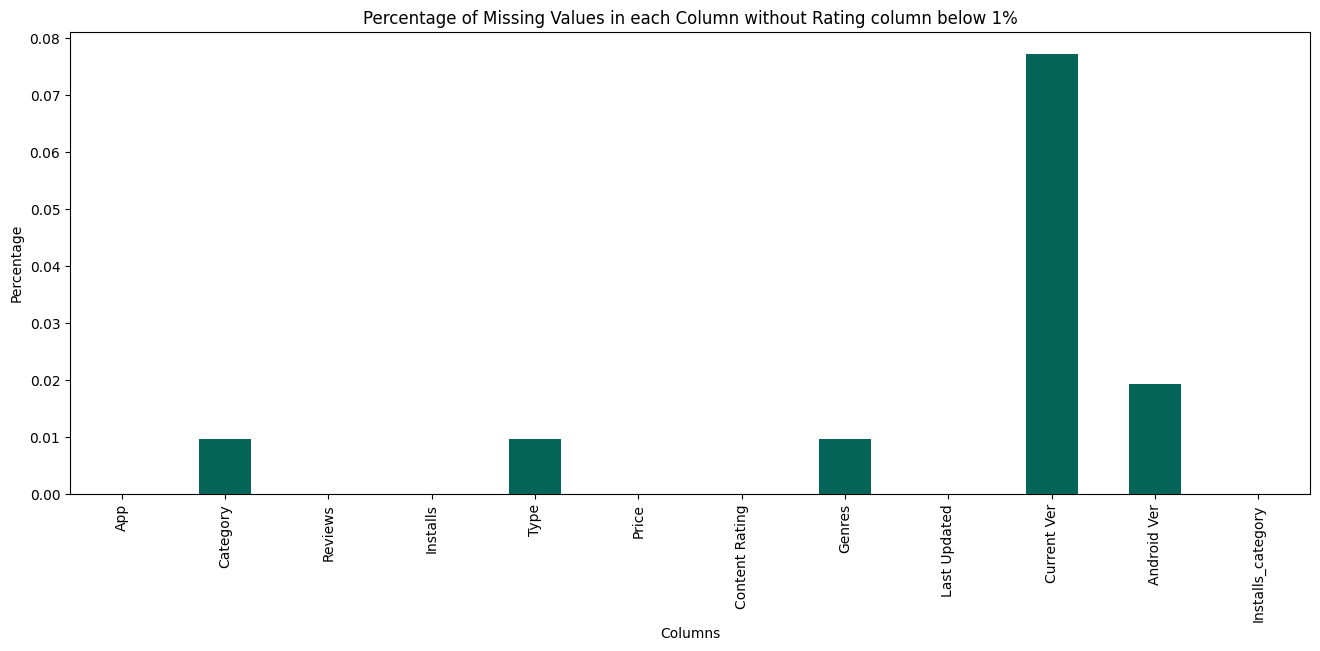

In [72]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar', color='#056559') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column below 1%')  # add the title for the plot

In [73]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_Bytes        1526
Size_in_Mb           1526
Rating               1465
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [74]:
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_Bytes        14.73
Size_in_Mb           14.73
Rating               14.14
Current Ver           0.08
Android Ver           0.02
Category              0.01
Type                  0.01
Genres                0.01
App                   0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

---
### Observations

- We have `1526` missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is `14.73%` of the total values in the column.
- We have `1465` missing values in the `'Rating'` column, which is `14.14%` of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.08% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.02% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.01% of the total values in the column.
- 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10358 non-null  object  
 1   Category           10357 non-null  object  
 2   Rating             8893 non-null   float64 
 3   Reviews            10358 non-null  int64   
 4   Size_in_Bytes      8832 non-null   float64 
 5   Installs           10358 non-null  int64   
 6   Type               10357 non-null  object  
 7   Price              10358 non-null  float64 
 8   Content Rating     10358 non-null  object  
 9   Genres             10357 non-null  object  
 10  Last Updated       10358 non-null  object  
 11  Current Ver        10350 non-null  object  
 12  Android Ver        10356 non-null  object  
 13  Size_in_Mb         8832 non-null   float64 
 14  Installs_category  10358 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memory usa

# 8.2. Dealing and with Missing Values

- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.

---
- Lets run the correlations

In [76]:
# These are the numeric columns
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
count,8893.000000,1.035800e+04,8.832000e+03,1.035800e+04,10358.000000,8832.000000
mean,4.187619,4.058654e+05,2.231930e+07,1.415639e+07,1.030701,21.285343
std,0.522910,2.696651e+06,2.363507e+07,8.023580e+07,16.277843,22.540155
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.200000e+01,4.928307e+06,1.000000e+03,0.000000,4.700000
50%,4.300000,1.678500e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,4.640425e+04,3.040870e+07,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

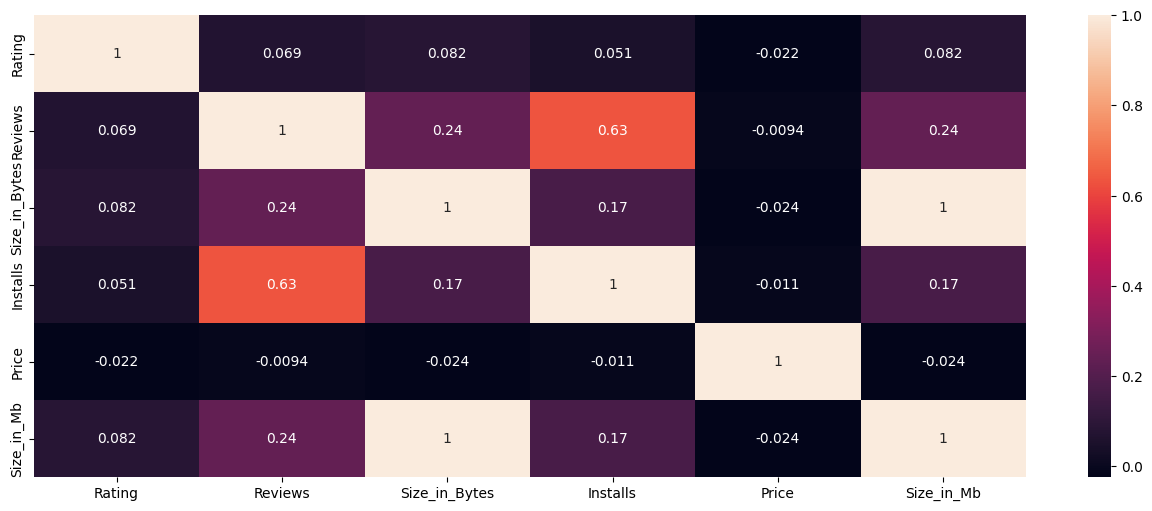

In [77]:
# Make the correlation matric of numeric columns
plt.figure(figsize=(16, 6)) # figure size
numeric_cols = ['Rating', 'Reviews', 'Size_in_Bytes', 'Installs', 'Price', 'Size_in_Mb'] # numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the heatmap of correlation matrix

In [78]:
# We can also use another method to calculate correlation using pandas
df[numeric_cols].corr() # this will show the correlation matrix of numeric columns

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068738,0.082339,0.050925,-0.022301,0.082339
Reviews,0.068738,1.000000,0.237896,0.634998,-0.009416,0.237896
Size_in_Bytes,0.082339,0.237896,1.000000,0.168880,-0.023762,1.000000
Installs,0.050925,0.634998,0.168880,1.000000,-0.011146,0.168880
Price,-0.022301,-0.009416,-0.023762,-0.011146,1.000000,-0.023762
Size_in_Mb,0.082339,0.237896,1.000000,0.168880,-0.023762,1.000000


In [79]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# for this we need to use scipy library
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6320


In [80]:
# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Size_in_Bytes'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.1670


---
### Obseravtions

- Lighter color shows the high correlation and darker color shows the low correlation.
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is 0.63 according to correlation, which is quite good.
   - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
   - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.


---
- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [81]:
# Length Before removing oof our data frame
print(f"The length of our dataframe before removing the missing/Null values: {len(df)}")

The length of our dataframe before removing the missing/Null values: 10358


In [82]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes        1526
Size_in_Mb           1526
Rating               1465
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [83]:
# let's Remove the rows with null values in the 'current ver', 'Android ver' etc.clear_output
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [84]:
# Now let's check length after removing the Null values
print(f"The lenght of our dataframe after removing Null values: {len(df)}")

The lenght of our dataframe after removing Null values: 10346


- We have removed 12 rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [85]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes        1525
Size_in_Mb           1525
Rating               1460
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
### Observations

- We have left with just 2 columns with null values that are `Rating` and `Size_in_Bytes` or `Size_in_Mb`.
  - But we need to be very careful before removing them as they both are dirfectly linked together.
  - In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [86]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [87]:
# Let's use groupby function to find out the trend between rating and installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1255.0,4.170040,0.829420,1.0,3.8,4.4,4.8,5.0
Moderate,1413.0,4.031352,0.605581,1.4,3.8,4.2,4.5,5.0
More than moderate,1571.0,4.094653,0.504221,1.6,3.9,4.2,4.5,4.9
High,2000.0,4.207100,0.378591,1.8,4.0,4.3,4.5,4.9
Very High,1815.0,4.285675,0.301071,2.0,4.1,4.3,4.5,4.9
Top Notch,751.0,4.372170,0.195374,3.1,4.3,4.4,4.5,4.8


In [88]:
df.groupby('Installs_category')['Rating'].describe().T

Installs_category,no,Very low,Low,Moderate,More than moderate,High,Very High,Top Notch
count,0.0,81.000000,1255.00000,1413.000000,1571.000000,2000.000000,1815.000000,751.000000
mean,NaN,4.637037,4.17004,4.031352,4.094653,4.207100,4.285675,4.372170
std,NaN,0.845199,0.82942,0.605581,0.504221,0.378591,0.301071,0.195374
min,NaN,1.000000,1.00000,1.400000,1.600000,1.800000,2.000000,3.100000
25%,NaN,4.800000,3.80000,3.800000,3.900000,4.000000,4.100000,4.300000
50%,NaN,5.000000,4.40000,4.200000,4.200000,4.300000,4.300000,4.400000
75%,NaN,5.000000,4.80000,4.500000,4.500000,4.500000,4.500000,4.500000
max,NaN,5.000000,5.00000,5.000000,4.900000,4.900000,4.900000,4.800000


- So here we replace the respective missing values of Rating, with respect to the average give in each `Installs_Category`

In [89]:
# Let's make a new column called 'Installs_category' which will have the category of the Installs
# we will use bining method for this

bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [90]:
df['Installs_category'].value_counts()

Installs_category
Low                   2129
High                  2003
Very High             1815
More than moderate    1602
Moderate              1499
Top Notch              751
Very low               533
no                      14
Name: count, dtype: int64

In [91]:
#  again we will use groupby function to find out the trend between rating and installs_category
df.groupby('Installs_category')['Rating'].describe().T

Installs_category,no,Very low,Low,Moderate,More than moderate,High,Very High,Top Notch
count,0.0,81.000000,1255.00000,1413.000000,1571.000000,2000.000000,1815.000000,751.000000
mean,NaN,4.637037,4.17004,4.031352,4.094653,4.207100,4.285675,4.372170
std,NaN,0.845199,0.82942,0.605581,0.504221,0.378591,0.301071,0.195374
min,NaN,1.000000,1.00000,1.400000,1.600000,1.800000,2.000000,3.100000
25%,NaN,4.800000,3.80000,3.800000,3.900000,4.000000,4.100000,4.300000
50%,NaN,5.000000,4.40000,4.200000,4.200000,4.300000,4.300000,4.400000
75%,NaN,5.000000,4.80000,4.500000,4.500000,4.500000,4.500000,4.500000
max,NaN,5.000000,5.00000,5.000000,4.900000,4.900000,4.900000,4.800000


In [92]:
df['Rating'].isnull().sum()

1460

In [93]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   874
Very low              452
Moderate               86
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

- let's plot this and have look by visualization

Text(7, 3.5, 'Null values: 0')

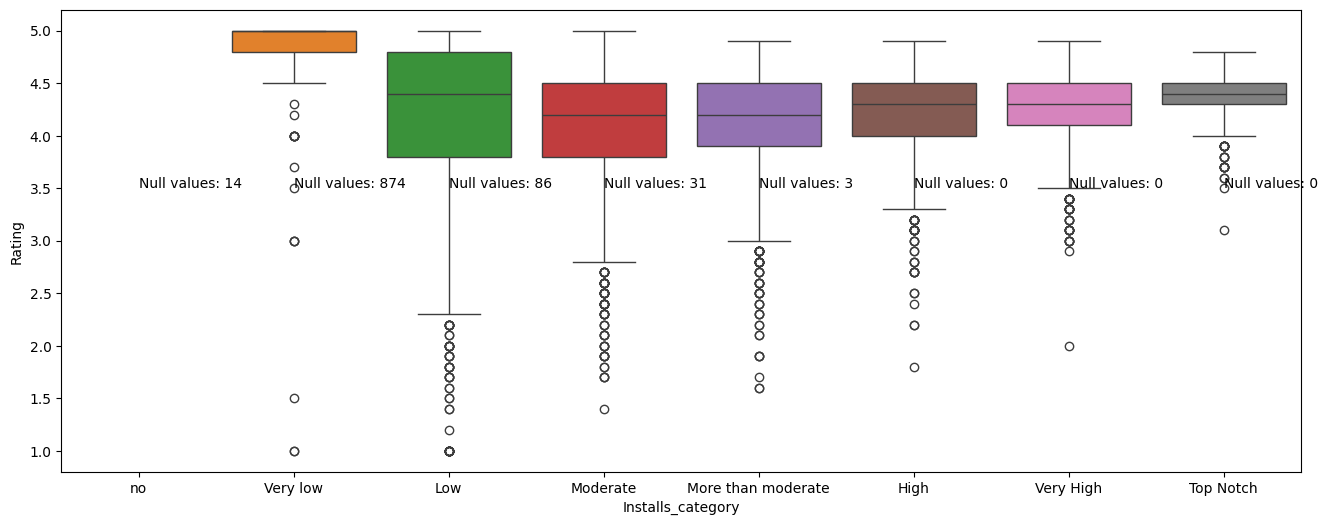

In [94]:
#  Let's plot the boxplot of rating in each Install_category
plt.figure(figsize=(16, 6)) # this decide our figure size
sns.boxplot(x='Installs_category', y='Rating',hue='Installs_category', data=df) # this will plot the boxplot of rating in each Install_category
# add the text of number of null values in eacha category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Now we make to chech if there is any link similar with Reviews as well

In [95]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- So here we have no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

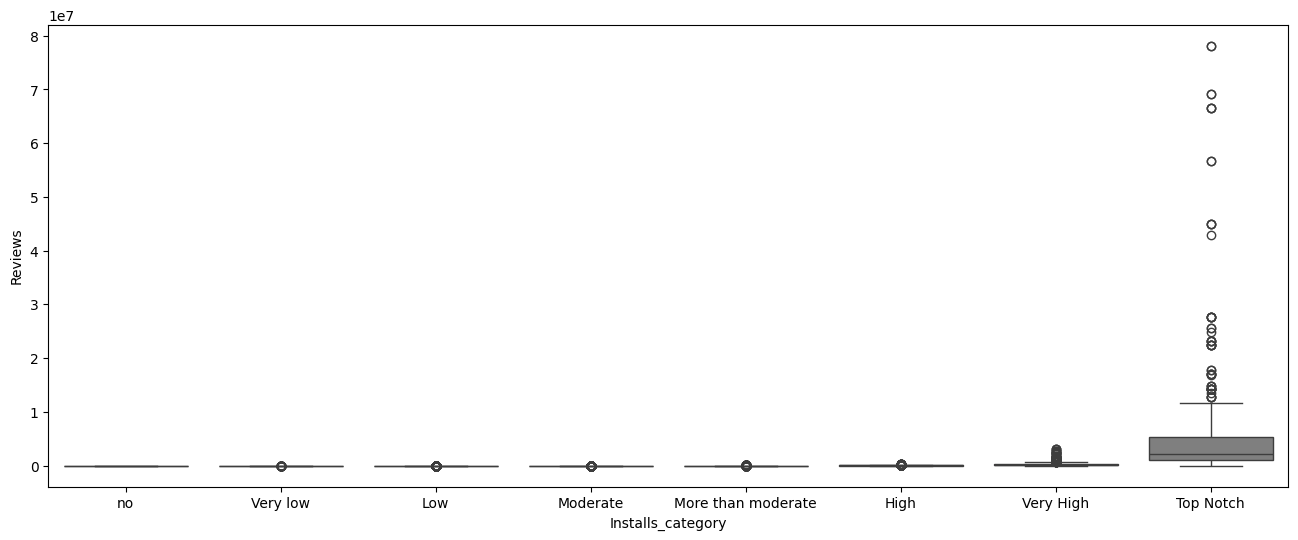

In [96]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews',hue='Installs_category', data=df) # plot the boxplot

- The data looks really imbalance.
- let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

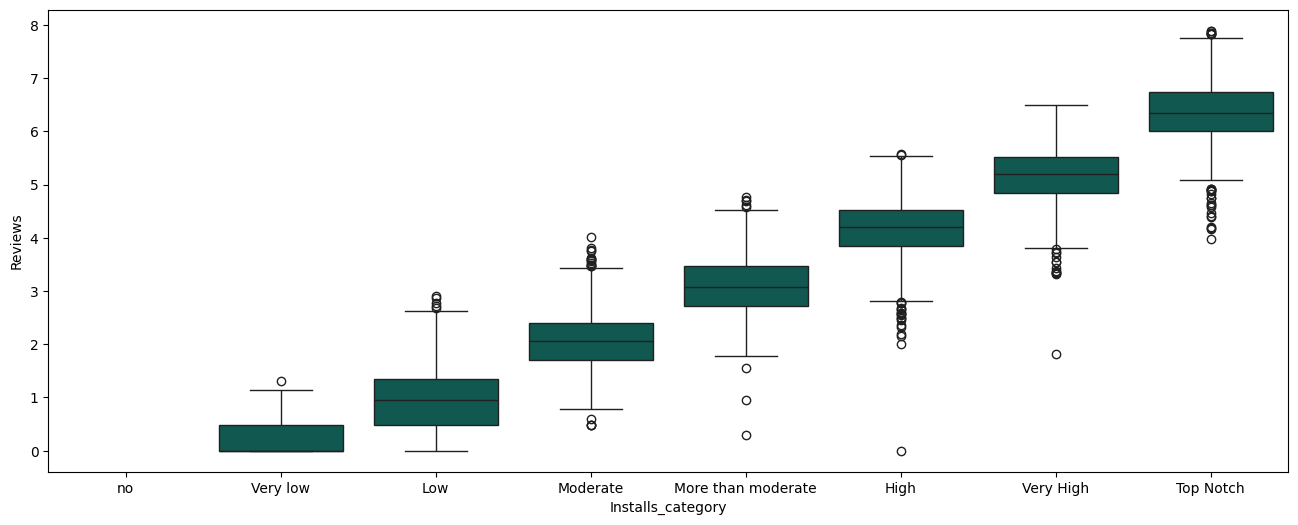

In [97]:
# Let's plot the same plot for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y = np.log10(df['Reviews']),color='#056559', data=df) # plot the boxplot

---
- We also draw the scatter plot of the `Rating` and `Review` columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

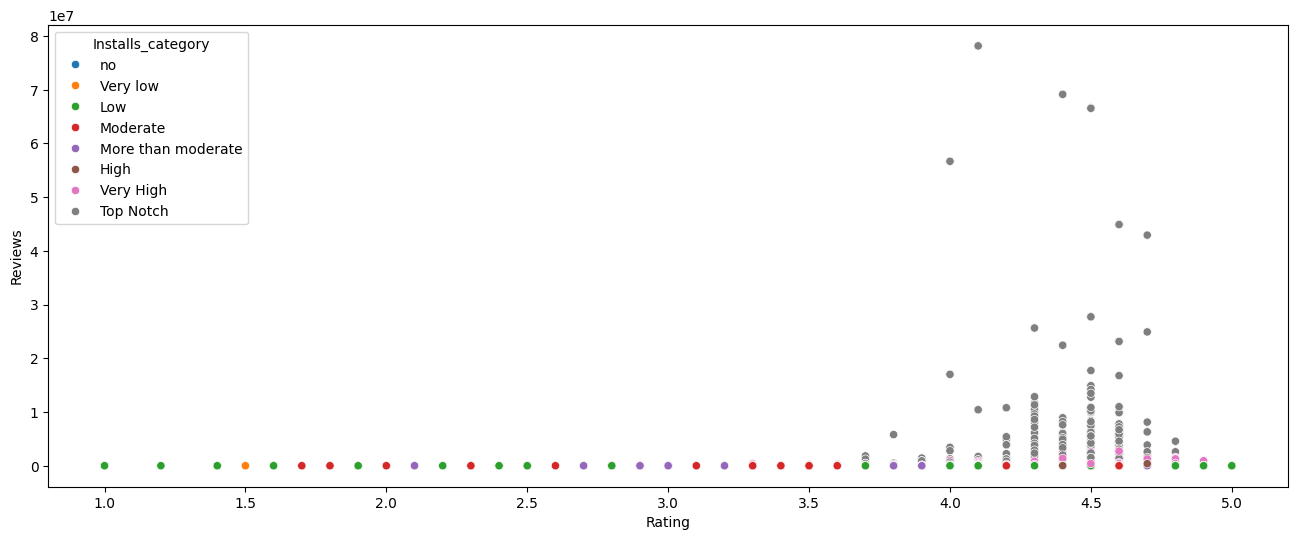

In [98]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

---
### Observations

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs


<Axes: xlabel='Reviews', ylabel='Installs'>

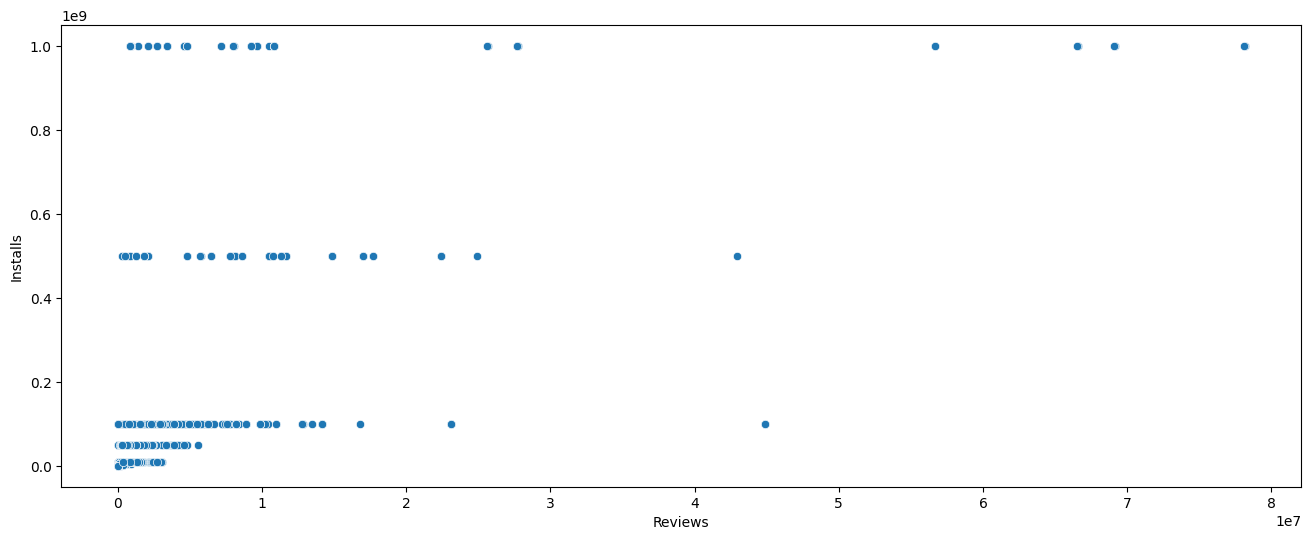

In [99]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

---
- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

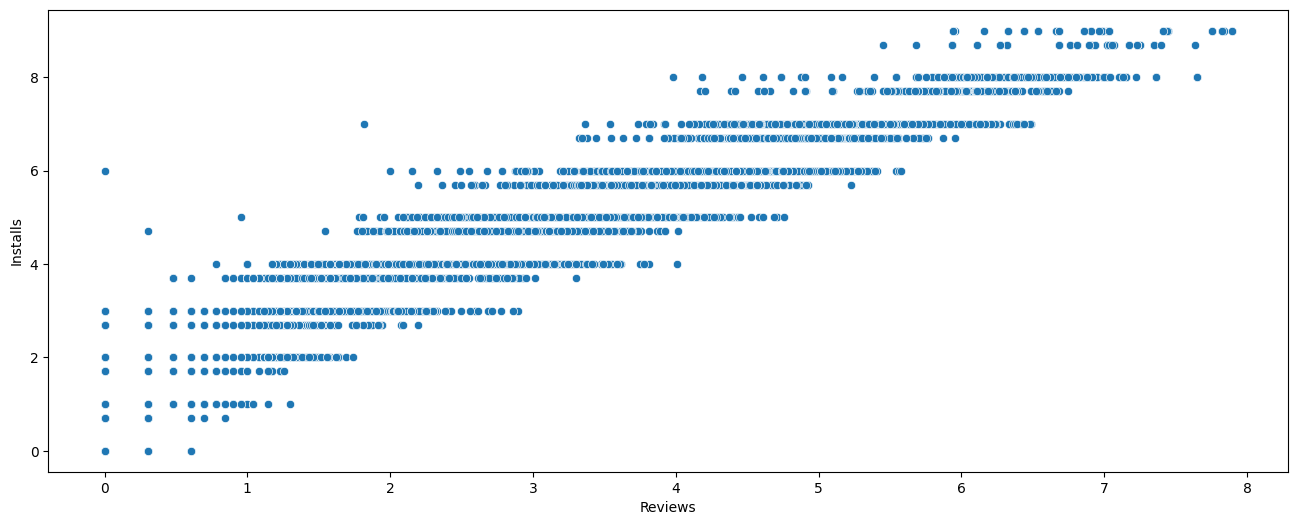

In [100]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

---
- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

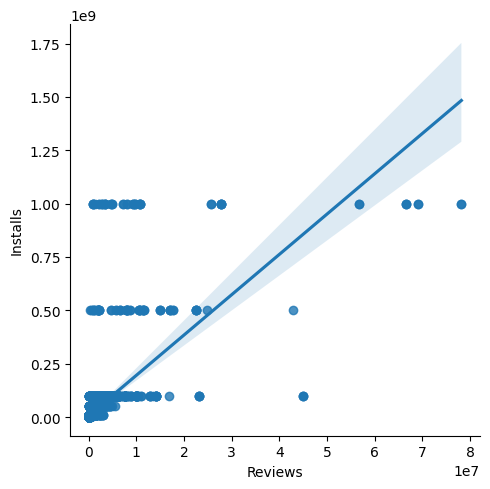

In [101]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

---
 - Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
### Observation

- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

# 9. Insights from data

## 9.1. Which category has the highest number of reviews? 

In [102]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

Category
GAME                   1415536650
COMMUNICATION           601273552
SOCIAL                  533576829
FAMILY                  396771746
TOOLS                   273181033
PHOTOGRAPHY             204297410
VIDEO_PLAYERS           110380188
PRODUCTIVITY            102554498
SHOPPING                 94931162
PERSONALIZATION          75192744
SPORTS                   65322708
TRAVEL_AND_LOCAL         55565160
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38245873
HEALTH_AND_FITNESS       30845186
MAPS_AND_NAVIGATION      30659254
EDUCATION                23165500
BOOKS_AND_REFERENCE      21873219
FINANCE                  16999891
WEATHER                  14604735
LIFESTYLE                12820575
BUSINESS                 12358171
FOOD_AND_DRINK            7671576
DATING                    5545397
COMICS                    3383276
HOUSE_AND_HOME            2794772
ART_AND_DESIGN            1714385
MEDICAL                   1396757
AUTO_AND_VEHICLES         1163666
LIBRA

- GAME category has the highest number of Reviews.

## 9.2.Which category has the highest number of apps?

In [103]:

# which category has highest number of apps
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

- FAMILY category has highest number of Apps. 

## 9.3. Which category has the highest number of installs?

In [104]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124333100
LIBRARIES_AND_DEMO        61995910
COMICS                    56086150
AUTO_AND_VE

- GAME category has highest number of Installs.

## 9.4.  Which category has the highest rating? 

In [105]:
# Category with highest average Rating
round(df.groupby('Category')['Rating'].mean().sort_values(ascending=False), 2)

Category
EVENTS                 4.44
ART_AND_DESIGN         4.38
EDUCATION              4.38
BOOKS_AND_REFERENCE    4.35
PERSONALIZATION        4.33
PARENTING              4.30
GAME                   4.28
BEAUTY                 4.28
HEALTH_AND_FITNESS     4.26
SOCIAL                 4.25
SHOPPING               4.25
WEATHER                4.24
SPORTS                 4.23
PRODUCTIVITY           4.20
FAMILY                 4.19
AUTO_AND_VEHICLES      4.19
PHOTOGRAPHY            4.18
MEDICAL                4.18
LIBRARIES_AND_DEMO     4.18
HOUSE_AND_HOME         4.16
FOOD_AND_DRINK         4.16
COMICS                 4.16
COMMUNICATION          4.15
ENTERTAINMENT          4.14
NEWS_AND_MAGAZINES     4.13
FINANCE                4.13
BUSINESS               4.10
LIFESTYLE              4.10
TRAVEL_AND_LOCAL       4.09
VIDEO_PLAYERS          4.06
MAPS_AND_NAVIGATION    4.05
TOOLS                  4.05
DATING                 3.97
Name: Rating, dtype: float64

- EVENTS Category has highest number of rating of 4.44.

<Axes: xlabel='Rating', ylabel='Density'>

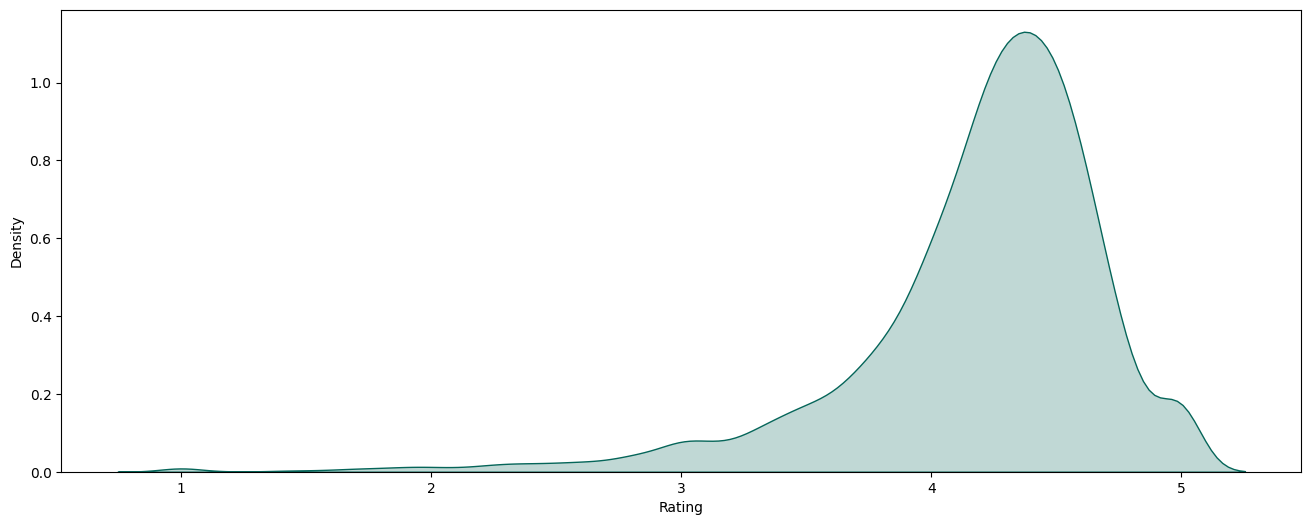

In [106]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="#056559",shade=True) # plot the distribution plot

In [107]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


## 9.5. What is the average rating of paid apps compared to free apps on the Play Store?

In [108]:
paid_apps_avg_rating = round(df[df['Price'] > 0]['Rating'].mean(), 2)
free_apps_avg_rating = round(df[df['Price'] == 0]['Rating'].mean(), 2)

print("Average rating of paid apps:", paid_apps_avg_rating)
print("Average rating of free apps:", free_apps_avg_rating)

Average rating of paid apps: 4.26
Average rating of free apps: 4.18


- Average rating of paid apps is greater than free apps.

## 9.6. What is the distribution of app ratings across different categories?

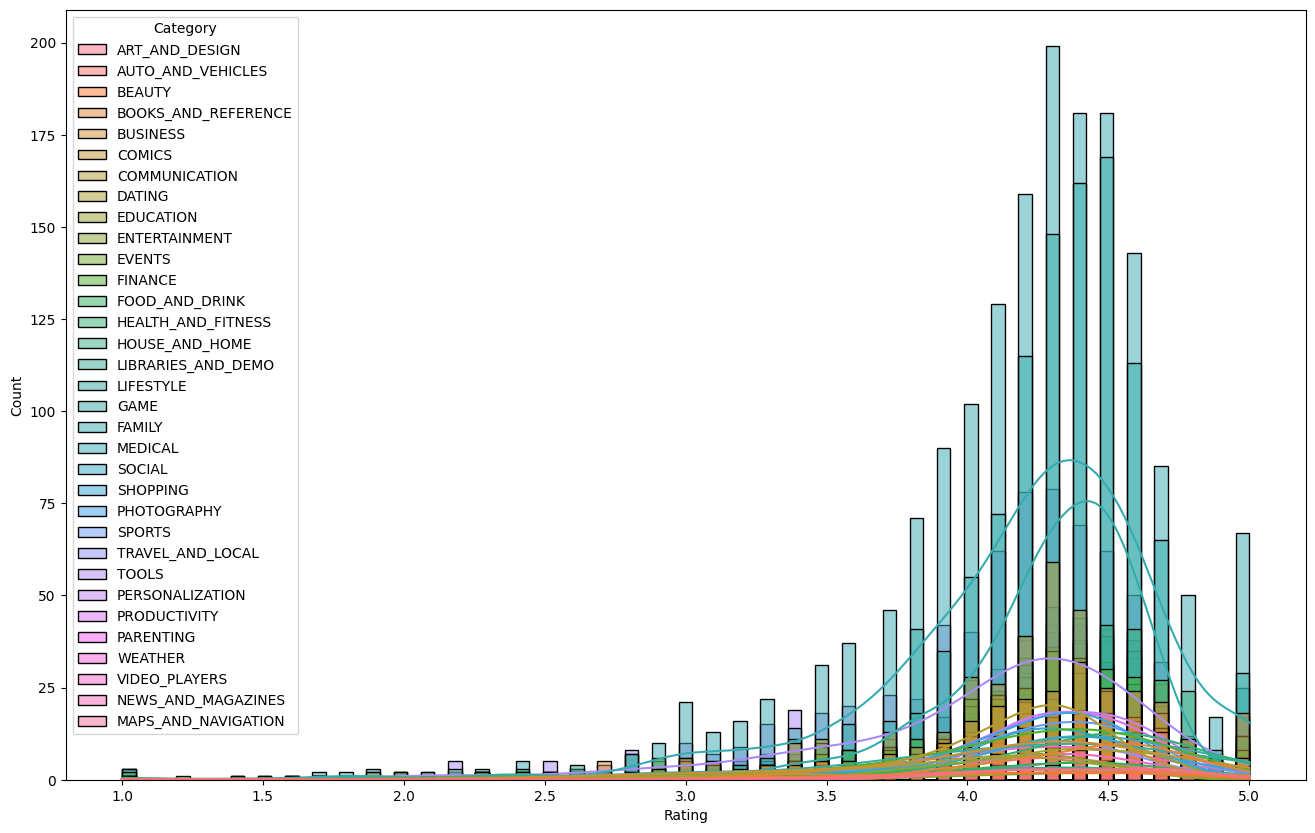

In [109]:
plt.figure(figsize = (16, 10))
sns.histplot(data = df, x = 'Rating', hue = 'Category', kde = True)
plt.show()

## 9.7. How do app prices influence the number of installations.

In [110]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [111]:
df.groupby('Price')['Installs'].sum().sort_values(ascending = False)

Price
0.00      146561162546
6.99          21133100
0.99          20337363
2.99          10290022
1.99           4001131
4.99           3434680
5.99           2774912
3.99           2169251
2.49           1738831
9.99            484600
4.49            416600
1.49            292159
3.49            211610
24.99           210100
8.99            200555
3.95            200000
399.99          188100
11.99           160000
7.99            132100
14.99           132060
9.00            100000
13.99           100000
2.90            100000
29.99            52020
19.99            52020
4.77             50000
5.49             11030
16.99            11000
10.00            11000
1.00             10500
17.99            10500
12.99            10300
2.50             10000
389.99           10000
299.99           10000
1.20             10000
18.99            10000
1.59             10000
1.97             10000
400.00           10000
2.95             10000
3.90             10000
3.28             10000
2.59 

---
### Observations

- Apps which are Free to use have the maximum number of installation.
- When prices of app starting to increase installation rate starting to decrease.
- The price with $28.99 has only 1 install.
- The app with prices greater than $28.99 have no installtions.

## 9.8. What is the average size of an app?

In [112]:
# For this we will find mean of the Size_in_Mb column
round(df['Size_in_Mb'].mean(), 2)

print(f"The mean of the Size_in_Mb column is: {round(df['Size_in_Mb'].mean(), 2)}")


The mean of the Size_in_Mb column is: 21.31


- Hence, The average size of app is 21.31 MB's.

## 9.9. Is there a relationship between the size of an app and its rating on the Play Store?

In [113]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [114]:
# For this we will make correaltion
df[['Size_in_Mb', 'Rating']].corr()

,Size_in_Mb,Rating
Size_in_Mb,1.000000,0.081874
Rating,0.081874,1.000000


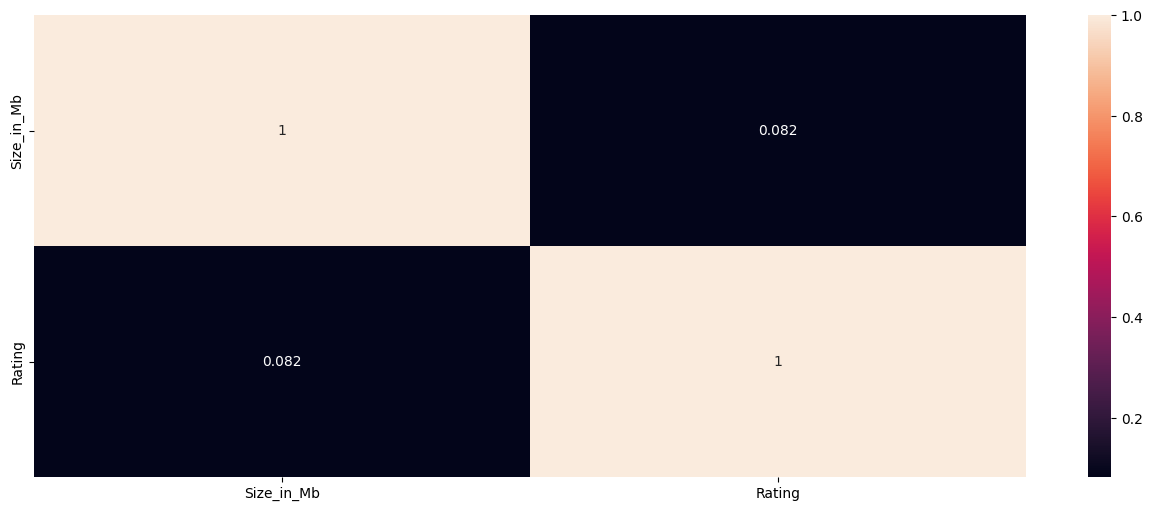

In [115]:
# Lets plot a heatmap of the correlation matrix
plt.figure(figsize = (16, 6))
sns.heatmap(df[['Size_in_Mb', 'Rating']].corr(), annot = True, cbar =True)
plt.show()

---
- There is no correlation between Size and Rating.

## 9.10. What is the average size of Gaming apps and Number of installations?

In [116]:
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [117]:
# Again we take the help of mean
round(df[df['Category'] == 'GAME']['Size_in_Mb'].mean(), 2)

44.13

---
- The average size of game is 44.13 Mb's

In [118]:
df[df['Category'] == 'GAME']['Installs'].sum()

31544024415

---
- Total number odf installation of Game App's is 31544024415.

## 9.11. What is the total numbers of installs of Garena Free Fire game?

In [119]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [120]:
df[df['App'] == 'Garena Free Fire']['Installs'].sum()

300000000

In [121]:
df[df['App'] == 'Garena Free Fire']['Installs_category']

1718     Top Notch
1915     Top Notch
10327    Top Notch
Name: Installs_category, dtype: category
Categories (8, object): ['no' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'Very High' < 'Top Notch']

---
- Garena Free Fire have 300000000 installs and falls in Top Notch Category of installs.

## 9.12. Free top 5 rated apps

In [122]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


In [123]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9290,EF Forms,BUSINESS,5.0,2,24117248.0,50,Free,0.0,Everyone,Business,"July 24, 2018",1.29,4.4 and up,23.0,Low
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3984588.8,500,Free,0.0,Everyone,Entertainment,"January 12, 2018",2.0,4.0 and up,3.8,Low
6398,BK Gold App,FINANCE,5.0,4,11534336.0,50,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up,11.0,Low
10629,Florida Wildflowers,FAMILY,5.0,5,72351744.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,69.0,Low
9659,FAST EO,EVENTS,5.0,1,NaN,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,NaN,Very low


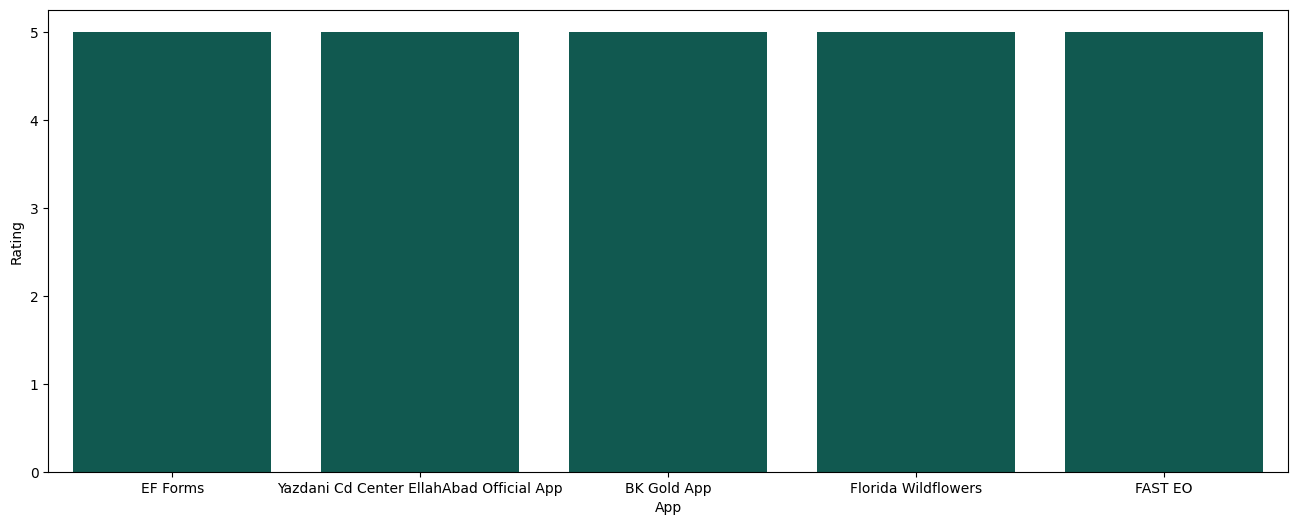

In [124]:
# Let's make a plot
plt.figure(figsize=(16, 6)) 
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5), color = '#056559')
plt.show()

## 9.13. Top paid 5 rated apps

In [125]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,Low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,Very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,Very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,Low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,Very low


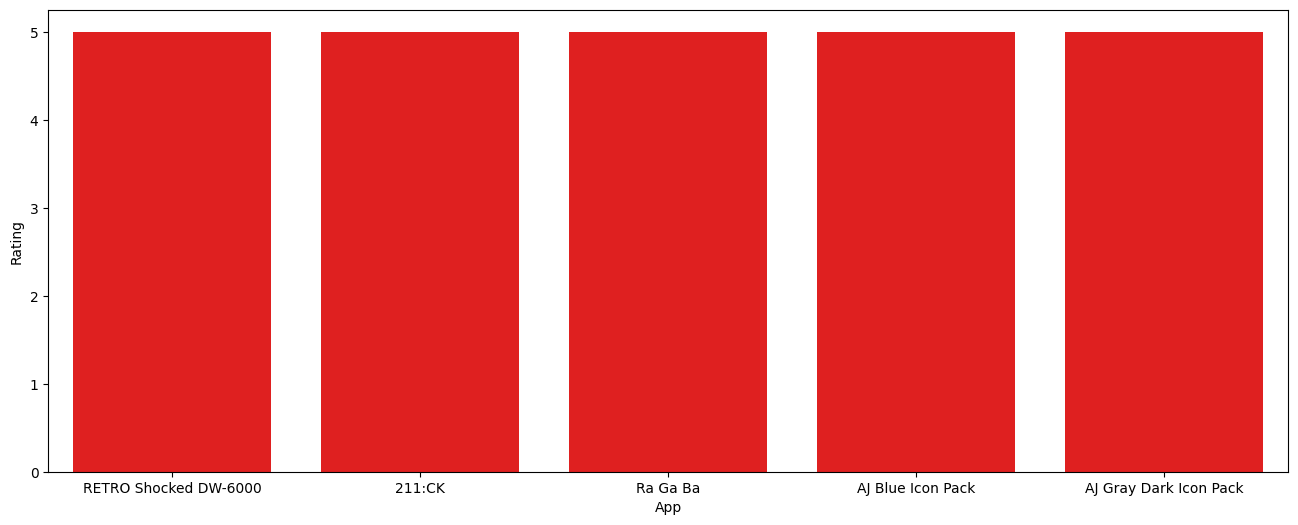

In [126]:
# Let's plot them
plt.figure(figsize=(16, 6))
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5), color = 'Red')
plt.show()

## 9.14. Top free app having highest reviews

In [127]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


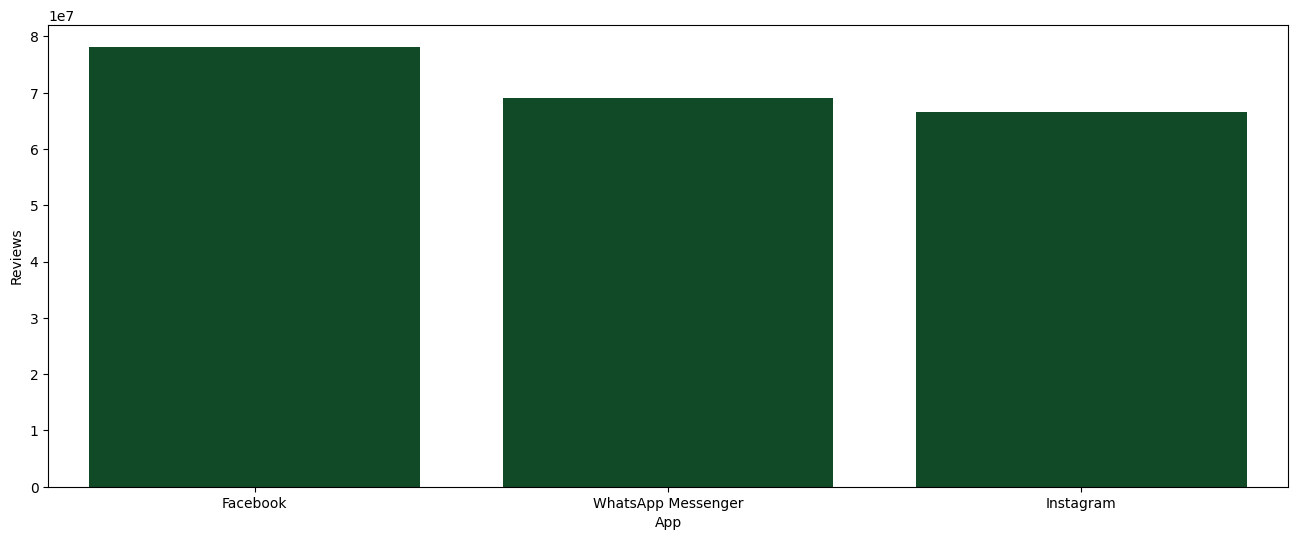

In [128]:
# Let's make a plot
plt.figure(figsize=(16, 6)) 
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5), color = '#065425')
plt.show()

# Conclusion

- GAMES have the highest number of Reviews.
- FAMILY category has the highest number of Apps.
- GAMES have the highest number of install.
- GAMES also have the highest number of Rating.
- Average Rating of Paid apps is 4.28.
- The  price of an App influences the number of installs greatly.
  -  Free app have max number of installations.
  - Paid app with fee of $29.99 have only one install.
  - Above $29.99 apps have 0 installations.
- The average size of app is 21.31 MB's.
- There is no relationship between size of an App and Rating of an App.
- Average Size of a gamming app is 41.13 Mb's and have 31544024415 installations.
- Garena Free Fire have 300000000 installs and falls in Top Notch Category of installs.
-  Free top 5 rated apps
  - EF FORMS
  - Yazdeni Cd Center Ellahbad Official App
  - BK Bold App
  - Florida Wildflowers
  - FAST EO
- 5 Top paid 5 rated apps:
  - RETRO Shocked DW-6000
  - 211:Ck
  - Ra Ga Ba App
  - Aj Blue Icon Pack
  - Aj Gray Dark Icon Pack
- Top 3 free apps with highest reviews:
  - Facebook
  - WhatsApp Messenger App
  - Instagram